In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Plotting $L^{CLIP}$

In [2]:
# Define hyperparameter epsilon
epsilon = 0.2

# Create a range of probability ratios
r = np.linspace(0.5, 1.5, 400)

# Clipping function: restricts r to the interval [1-epsilon, 1+epsilon]
def clip(r, epsilon):
    return np.clip(r, 1 - epsilon, 1 + epsilon)

In [3]:
# For demonstration, consider both positive and negative advantages

# Positive advantage case (e.g., A_t = 1)
A_pos = 1.0
objective_pos = r * A_pos
clipped_objective_pos = clip(r, epsilon) * A_pos
min_objective_pos = np.minimum(objective_pos, clipped_objective_pos)

# Negative advantage case (e.g., A_t = -1)
A_neg = -1.0
objective_neg = r * A_neg
clipped_objective_neg = clip(r, epsilon) * A_neg
min_objective_neg = np.minimum(objective_neg, clipped_objective_neg)


/tmp/ipykernel_494574/1706405829.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axs[0].plot(r, min_objective_pos, 'k--', label=r'$\min(\cdot)$', c='black')
/tmp/ipykernel_494574/1706405829.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  axs[1].plot(r, min_objective_neg, 'k--', label=r'$\min(\cdot)$', c='black')


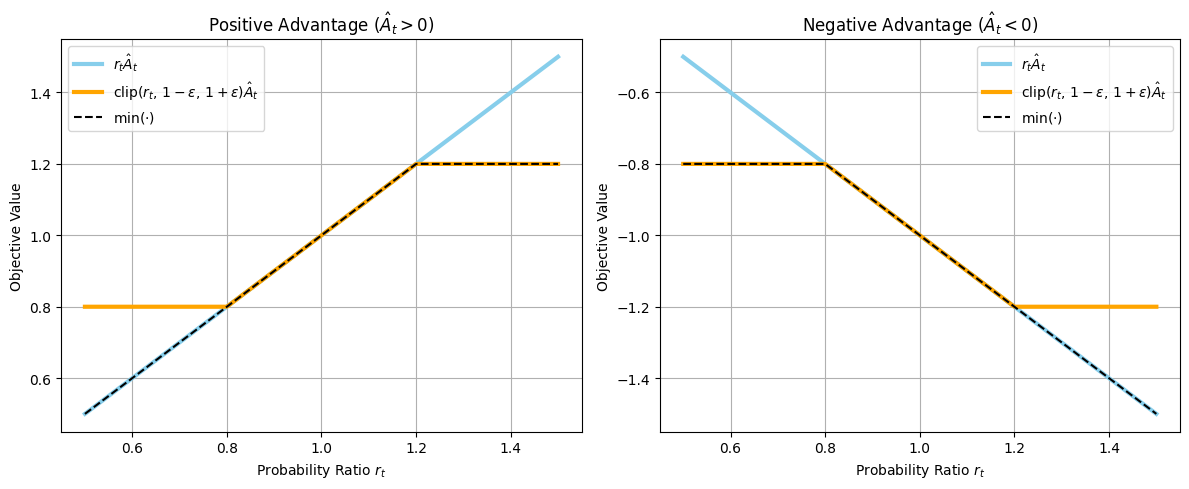

In [17]:
# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for positive advantage
axs[0].plot(r, objective_pos, label=r'$r_t \hat{A}_t$', color='skyblue', linewidth=3)
axs[0].plot(r, clipped_objective_pos, label=r'$\mathrm{clip}(r_t,\, 1-\epsilon,\, 1+\epsilon)\hat{A}_t$', color='orange', linewidth=3)
axs[0].plot(r, min_objective_pos, 'k--', label=r'$\min(\cdot)$', c='black')
axs[0].set_title("Positive Advantage ($\\hat{A}_t > 0$)")
axs[0].set_xlabel("Probability Ratio $r_t$")
axs[0].set_ylabel("Objective Value")
axs[0].legend()
axs[0].grid(True)

# Plot for negative advantage
axs[1].plot(r, objective_neg, label=r'$r_t \hat{A}_t$', color='skyblue', linewidth=3)
axs[1].plot(r, clipped_objective_neg, label=r'$\mathrm{clip}(r_t,\, 1-\epsilon,\, 1+\epsilon)\hat{A}_t$', color='orange', linewidth=3)
axs[1].plot(r, min_objective_neg, 'k--', label=r'$\min(\cdot)$', c='black')
axs[1].set_title("Negative Advantage ($\\hat{A}_t < 0$)")
axs[1].set_xlabel("Probability Ratio $r_t$")
axs[1].set_ylabel("Objective Value")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.savefig('figures/L_clip.jpg', dpi=150)
plt.show()